### Question2 : Logistic Regression 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Assumption
1. Our output i.e Chance of Admit has continous probability , we have to convert it into discreate class.
2.   **1** is for Good Chance of Admitted 
3.    **0** is for bad chance of Admitted

In [6]:
df=pd.read_csv("AdmissionDataset/data.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,242,317,103,2,2.5,2.0,8.15,0,0.65
1,334,319,108,3,3.0,3.5,8.54,1,0.71
2,4,322,110,3,3.5,2.5,8.67,1,0.80
3,45,326,113,5,4.5,4.0,9.40,1,0.91
4,232,319,106,3,3.5,2.5,8.33,1,0.74


In [7]:
df.drop('Serial No.',axis=1,inplace=True)

In [8]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,317,103,2,2.5,2.0,8.15,0,0.65
1,319,108,3,3.0,3.5,8.54,1,0.71
2,322,110,3,3.5,2.5,8.67,1,0.80
3,326,113,5,4.5,4.0,9.40,1,0.91
4,319,106,3,3.5,2.5,8.33,1,0.74


In [9]:
training_data = df.sample(frac = 0.8, random_state = 200)
testing_data = df.drop(training_data.index)

### Feature Normalisation
${x_i}$= $\frac{x_i - \mu}{\sigma}$ 

Feature Normalisation is done because data in some columns is very small in comparison to other columns data.

In [10]:
columns=training_data.shape[1]
X=training_data.iloc[:,0:columns-1]# features Sets

mu=X.mean()
sigma=X.std()

# features normalisation
X=(X-X.mean())/X.std()

Y=training_data.iloc[:,columns-1:columns] # outputSet
X.insert(0, 'Ones', 1)
X.head()

,Ones,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
198,1,-0.126730,-1.030256,-0.105307,0.130771,1.132289,0.911363,-1.091697
39,1,-0.389434,-0.366764,-0.986945,-0.881652,-0.487409,-0.769447,-1.091697
215,1,-0.739706,0.462602,-0.105307,0.130771,-0.487409,-0.969147,0.913461
303,1,-0.389434,0.130855,-0.105307,0.130771,-0.487409,-0.087138,-1.091697
377,1,0.398678,0.296729,0.776331,0.636983,0.592390,0.162488,0.913461


In [11]:
X = np.matrix(X.values)
Y = np.matrix(Y.values)
# print(X.shape)
# print(Y.shape)

#Convert the Y into discreate, keeping the 0.5 is the threshold
Y= (Y >=0.5)



#### Sigmoid Function 
${g(z)}$=${(1+e^{-z})^{-1} }$

In [12]:
def sigmoid(z):
    g=0.0
    g=1+np.exp(-z)
    return np.power(g,-1)

#### CostFunction
${J(\theta)} =-{\frac{1}{m}}{\sum_{i=0}^{m}}[{y_i}{log\hat{y_i}}+(1-{y_i}){log(1-\hat{y_i}})]$

J: is cost function


m : no. of training examples

${\theta}$: parameters

In [17]:
def CostFunction(X,y,theta):
    prediction1= np.log(sigmoid(X*theta.T))
    prediction2= np.log(1-sigmoid(X*theta.T))
    prediction1=np.multiply(y,prediction1)
    prediction2=np.multiply((1-y),prediction2)
    return -(np.sum(prediction1+prediction2))/X.shape[0]

#### Gradient Descent algo
repeat Untill Converges{


${{\theta_j} :=}{{\theta_j}}$-${\alpha}$*${\frac{\partial}{\partial {\theta_j}} J(\theta)}$


}

${\alpha}$: Learning rate constant

In [18]:
def gradientDescent(X, y, theta, alpha, iters):
    
    Jhistory=np.zeros(iters)
    m=len(X)
    for i in range(iters):
        pre = (X*theta.T)-y
        #print(pre.shape)
        delta=np.dot(np.transpose(pre),X)
        theta=theta-(alpha/m)*delta
        
        
        Jhistory[i] = CostFunction(X, y, theta)
        
    return theta,Jhistory

#### Behavoiur of ${ \alpha} $ 
1. If we put ${\alpha=}$ some -ve value like ${-.001}$ then we can see that cost is increasing w.r.t to no of iterations.
2. Generally , we take alpha value initially some like .001 , then kept increasing by multiple of 3 and keep seeing the behavour of cost w.r.t to ${\alpha}$ and no of iterations. 
3. ${\alpha}$ can't be too big because it overshoot the gradient and can't be too small because it will be too slow .
4. Change the alpha , see the change in behaviour of cost function.

In [19]:
alpha=.009
iters=1000
theta = np.matrix(np.array([0,0,0,0,0,0,0,0]))
minTheta, cost2= gradientDescent(X, Y, theta, alpha, iters)
print(minTheta.shape)
print(minTheta)

(1, 8)
[[ 9.13780609e-01  1.64873217e-02  3.74605306e-02 -2.68236756e-02
  -3.01325158e-02  4.75261309e-02  8.30618377e-02  9.07701687e-04]]


Text(0.5, 1.0, 'Visualisation of change in Cost w.r.t to iterations')

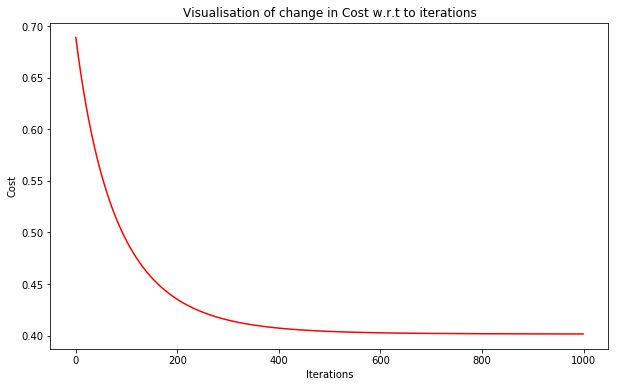

In [20]:
ig, ax = plt.subplots(figsize=(10,6))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Visualisation of change in Cost w.r.t to iterations')

In [21]:
# for testing data
columns=testing_data.shape[1]
X_test=testing_data.iloc[:,0:columns-1]# features Sets
Y_test=testing_data.iloc[:,columns-1:columns] # outputSet
Y_test=(Y_test>=0.5)
print(X_test.shape)

(90, 7)


In [22]:
def prediction(test_data,threshold=0.5):
    a=np.matrix(np.array([1]))
    m=np.matrix(np.array(mu))
    s=np.matrix(np.array(sigma))
    test=np.matrix(np.array(test_data))
    
    test=(test-m)/s
    
    test=np.hstack((a,test))
    z= np.dot(test,minTheta.T)
    z=sigmoid(z)
    if z > threshold:# 0.5 is our threshold,we set threshold acccording to observations
        return True
    else:
        return False

In [23]:
testSet = [315,103,2,2.5,2,8.5,0]# 7 features values
result = prediction(testSet)
print(result)

True


In [24]:
from sklearn.linear_model import LogisticRegression

a=np.matrix(np.array([1]))
m=np.matrix(np.array(mu))
s=np.matrix(np.array(sigma))
test=np.matrix(np.array(testSet))
test=(test-m)/s
test=np.hstack((a,test))

model = LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr')
model.fit(X, Y)

X_predict = np.matrix(np.array(test)) 
y_predict = model.predict(X_predict)
print(y_predict)

[ True]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
output=[]#empty list
#b=.2
for i in range(0,len(X_test)):
    a=prediction(X_test.iloc[i].tolist())
    #b=np.asscalar(a)
    output.append(a)
#print(output)

In [26]:
accuracy =np.count_nonzero(Y_test==output)/len(Y_test)*100
accuracy

95.55555555555556

#### Comparing with the sklearn library

In [27]:
from sklearn.metrics import accuracy_score
model = LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr')
model.fit(X, Y)
a=np.ones((X_test.shape[0],1))

a=np.hstack((a,X_test))
q_scikit = model.predict(a)
q_scikit=list(q_scikit)
#print(q_scikit)

accu_scikit =np.count_nonzero(Y_test==q_scikit)/len(Y_test)*100
accu_scikit

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


95.55555555555556

In [28]:
def pre_And_Recall(Y_test,output):
    Y_test=1*Y_test
    output=1*output
    actual_result=list(Y_test.values)
    Tp=0
    Tn=0
    Fp=0
    Fn=0
    for i in range(0,len(actual_result)):
        if actual_result[i]==output[i] and actual_result[i]==1:
            Tp+=1
        elif actual_result[i]==output[i] and actual_result[i]==0:
            Tn+=1
        elif actual_result[i]==0 and output[i]==1:
            Fp+=1
        else:
            Fn+=1

    accuracy=(Tp+Tn)/len(actual_result)
    precision=Tp/(Tp+Fp)
    recall=Tp/(Tp+Fn)
    F1_Score=2*precision*recall/(recall+precision)
    return accuracy,precision,recall,F1_Score

In [29]:
accuracy,precision,recall,F1_Score=pre_And_Recall(Y_test,output)
print(accuracy)
print(precision)
print(recall)
print(F1_Score)

0.9555555555555556
0.9555555555555556
1.0
0.9772727272727273


##### co-relation between threshold value vs precision and recall

In [30]:
threshold_list=[.2,.3,.4,.45,0.5,.55,0.6,.65,0.7,.75]

accu=[]
rec=[]
prec=[]

for x in range(0,len(threshold_list)):
    output=[]
    for i in range(0,len(X_test)):
        a=prediction(X_test.iloc[i].tolist(),threshold_list[x])
        output.append(a)
    accuracy,precision,recall,F1_Score=pre_And_Recall(Y_test,output)
    accu.append(accuracy)
    rec.append(recall)
    prec.append(precision)


Text(0.5, 1.0, 'Visualisation')

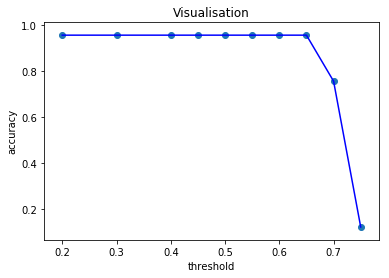

In [31]:
plt.plot(threshold_list,accu,'b')
plt.scatter(threshold_list,accu)
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.title('Visualisation')

Text(0.5, 1.0, 'Visualisation')

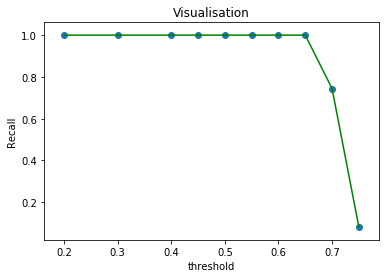

In [32]:
plt.scatter(threshold_list,rec)
plt.plot(threshold_list,rec,'g')
plt.xlabel('threshold')
plt.ylabel('Recall')
plt.title('Visualisation')

Text(0.5, 1.0, 'Visualisation')

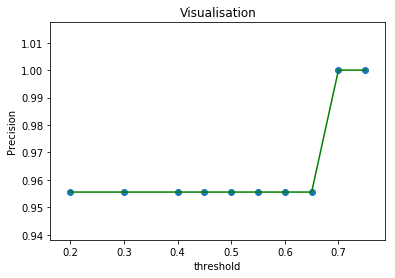

In [33]:
plt.scatter(threshold_list,prec)
plt.plot(threshold_list,prec,'g')

plt.xlabel('threshold')
plt.ylabel('Precision')
plt.title('Visualisation')

#### Compare the performances of logistic regression model with KNN model

In [34]:
#prepare the data for KNN
columns=training_data.shape[1]
XtrainKNN=training_data.iloc[:,0:columns-1]# features Sets

XtrainKNN=(XtrainKNN-mu)/sigma
YtrainKNN=training_data.iloc[:,columns-1:columns]
#YtrainKNN = np.matrix(YtrainKNN.values)
YtrainKNN=(YtrainKNN>=.5)
XtrainKNN=XtrainKNN.join(YtrainKNN*1)
XtrainKNN.head()


## test data for KNN
XtestKNN=testing_data.iloc[:,0:columns-1]# features Sets

XtestKNN=(XtestKNN-mu)/sigma
YtestKNN=testing_data.iloc[:,columns-1:columns]
#YtrainKNN = np.matrix(YtrainKNN.values)
YtestKNN=(YtestKNN>=.5)
XtestKNN=XtestKNN.join(YtestKNN*1)
XtrainKNN.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
198,-0.126730,-1.030256,-0.105307,0.130771,1.132289,0.911363,-1.091697,1
39,-0.389434,-0.366764,-0.986945,-0.881652,-0.487409,-0.769447,-1.091697,1
215,-0.739706,0.462602,-0.105307,0.130771,-0.487409,-0.969147,0.913461,0
303,-0.389434,0.130855,-0.105307,0.130771,-0.487409,-0.087138,-1.091697,1
377,0.398678,0.296729,0.776331,0.636983,0.592390,0.162488,0.913461,1


#### Euclidean Distance
>   distance= ${\sqrt{\sum_{i=0}^{N} ({x_i-y_i})^2 }}$ 

In [40]:
import operator
#vectorised Implementation 
def eucli_dist(point1,point2,length):
    point2=point2[0:length]
    point1=point1[0:length]
    a1=np.array(point1)
    a2=np.array(point2)
    return np.asscalar(np.sqrt(sum(np.square(a1-a2))))

In [41]:
def KNN(training_data,test, k):
    length = training_data.shape[1]-1
    help = []
    votes = {}
    for j in range(training_data.shape[0]):
        train_data = list(training_data.iloc[j])
            
        dist = eucli_dist(test, train_data, length)
        help.append((train_data, dist))
    #print(help)
            
    help.sort(key=operator.itemgetter(1))
    K_listNeighb = []

    for i in range(0, k):
        K_listNeighb.append(help[i][0])
        

    for i in range(0, len(K_listNeighb)):
        val = K_listNeighb[i][-1] 
        
        if val in votes:
            votes[val] += 1
        else:
            votes[val] = 1
            
    final_sort = sorted(votes.items(), key=operator.itemgetter(1), reverse = True )
    return final_sort[0][0]

In [42]:
value = [] 
def prediction(training_data,testing_data,k):
    
    accuracy=0.0
    
    right=0
    wrong=0
    
    for i in range(0,testing_data.shape[0]):
        inst = list(testing_data.iloc[i])
        actualAns = inst[-1]
        val = KNN(training_data,inst, k)
        
        if actualAns == val:
            right+=1
        else:
            wrong+=1
            
    accuracy = (right)/(right+wrong)*100
    
    value.append(accuracy)
    print("K = ",k," Accuracy ",accuracy,"%")

#### Prediction for different values of K

K =  1  Accuracy  92.22222222222223 %
K =  3  Accuracy  96.66666666666667 %
K =  5  Accuracy  96.66666666666667 %
K =  7  Accuracy  97.77777777777777 %
K =  9  Accuracy  97.77777777777777 %


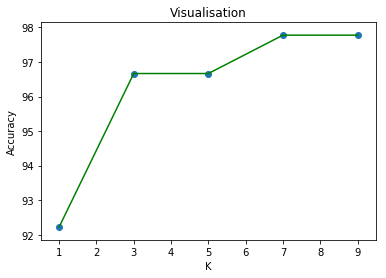

In [43]:
k = [1,3,5,7,9]
for i in range(1, 10, 2):
    prediction(XtrainKNN,XtestKNN,i)  

plt.plot(k,value,'g')
plt.scatter(k,value)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Visualisation')
plt.show()

#### for test file

In [ ]:
#do not run this on jupyter, download the python file and then with appropiate arguments
import sys
testFile=pd.read_csv(str(sys.argv[1]))
testFile.head()
testFile.drop('Serial No.',axis=1,inplace=True)
columns=testFile.shape[1]
X_testFile=testFile.iloc[:,0:columns-1]

outestFile=[]#empty list
for i in range(0,len(X_testFile)):
    a=prediction(X_testFile.iloc[i].tolist())
    b=np.asscalar(a)
    outestFile.append(b)

print(outestFile)